In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('data.csv')
x = np.asarray(data.iloc[:, 2],dtype = np.float32).reshape(-1,1)
y_correct = np.asarray(data.iloc[:, 3],dtype = np.float32).reshape(-1,1)

In [4]:
class RegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(RegressionModel, self).__init__() 
        # Calling Super Class's constructor
#         # nn.linear is defined in nn.Module
        self.linear = nn.Sequential(
            nn.Linear(input_dim,4),
            nn.Tanh(),
            nn.Linear(4, 3),
            nn.Tanh(),
            nn.Linear(3,3),
            nn.Tanh(),
            nn.Linear(3, 2),
            nn.Tanh(),
            nn.Linear(2,2),
            nn.Tanh(),
            nn.Linear(2,1),
        )

        
    def forward(self, x):
        # Here the forward pass is simply a linear function
        out = self.linear(x)
        return out

In [5]:
n = len(x)
m = 4

In [6]:
input_dim = 4
output_dim = 1

In [7]:
x_train = np.zeros(shape=(n,m))
# x_train = x

In [8]:
for i in range(0, n):
    for j in range(0, m):
        x_train[i][j] = np.power(x[i], (j+1))

print(x_train)
#print(type(x_train))

[[-2.          4.         -8.         16.        ]
 [-1.          1.         -1.          1.        ]
 [ 0.89999998  0.80999994  0.72899991  0.65609992]
 [ 1.          1.          1.          1.        ]
 [ 2.          4.          8.         16.        ]]


In [9]:
model = RegressionModel(input_dim,output_dim)

criterion = nn.MSELoss()# Mean Squared Loss

l_rate = 0.001

# optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent


optimiser = torch.optim.SGD(model.parameters(), lr = l_rate, momentum=0.01) #Momentum at 0.01
#optimiser = torch.optim.SGD(model.parameters(), lr = l_rate, momentum=0.5) #Momentum at 0.5


# optimiser = torch.optim.SGD(model.parameters(), lr = l_rate,momentum=0.5,nesterov= True) #Nestorv
#optimiser = torch.optim.SGD(model.parameters(), lr = l_rate,momentum=0.01,nesterov= True) #Nesto

epochs = 1000

In [10]:
for epoch in range(epochs):

    epoch +=1
    #increase the number of epochs by 1 every time
    
    inputs = Variable(torch.from_numpy(x_train)).float()
    yvals = Variable(torch.from_numpy(y_correct))

    #clear grads 
    optimiser.zero_grad()
    
    
    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, yvals)
    
    loss.backward() # back props
    
    optimiser.step() # update the parameters
    #print(outputs)
    #print('epoch {}, loss {}'.format(epoch,loss.data[0]))

In [11]:
#predicted = model.forward(Variable(torch.from_numpy(x_train))).data.numpy()
# print (outputs)
predicted = model.forward(torch.from_numpy(x_train).float()).data.numpy()
# result = model.state_dict()['linear0.weight']
# print(result)
# print(predicted)

In [12]:
#Starting the testing process
testdata = pd.read_csv('valz.csv')
testx=np.asarray(testdata.iloc[:, 1],dtype = np.float32).reshape(-1,1)
testy=np.asarray(testdata.iloc[:, 2],dtype = np.float32).reshape(-1,1) #?? needed?


In [13]:
x_test = np.zeros(shape=(len(testx),m))

In [14]:
# for l in range(1,len(testx)):
#     if 4%l == 0 :
for i in range(0, len(testx)):
    for j in range(0, m):
        x_test[i][j] = np.power(testx[i], (j+1))
#print(x_test)

In [15]:
yhat = model.forward(torch.from_numpy(x_test).float()).data.numpy()
error = np.linalg.norm((testy-yhat)) 
print(error)

18.735767


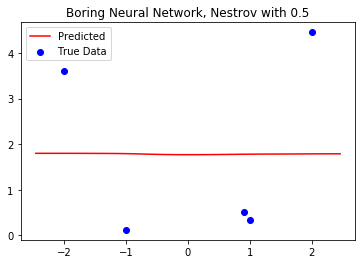

In [16]:

plt.plot(testx, yhat, label="Predicted", color = "red")

#plotting old data
plt.scatter(x, y_correct, label ="True Data", color = "Blue")


plt.title("Boring Neural Network, Nestrov with 0.5")
plt.legend()